# Data Wrangling Template

In [1]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Gather

In [2]:
#import twitter archive dataset into pandas DataFrame
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#Gather the image predictions dataset 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', mode='wb') as file:
        file.write(response.content)

In [4]:
#import the image predictions file into pandas DataFrame
img_pred_df = pd.read_csv('image-predictions.tsv', sep ='\t')

In [5]:
#read the twitter API JSON file, and import it into pandas DataFrame
tweets_details = []
with open('tweet-json.txt', 'r') as f:
    for line in f:
        tweet = json.loads(line)
        tweets_details.append({'tweet_id': tweet['id'],'rt_count': tweet['retweet_count'],'fav_count': tweet['favorite_count']})
        
fav_rt_df = pd.DataFrame(tweets_details)

Note: Due to difficulties in getting approval for a Twitter developer account to actually gather data through Twitter API, I had to download the JSON file directly from Udacity website.

## Assess

In [6]:
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
twitter_archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [10]:
twitter_archive_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [11]:
twitter_archive_df.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [12]:
img_pred_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [13]:
img_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
img_pred_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
len(img_pred_df[img_pred_df.duplicated(subset=img_pred_df.columns.difference(['tweet_id']))])

66

In [16]:
fav_rt_df

,fav_count,rt_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256
5,20562,3261,891087950875897856
6,12041,2158,890971913173991426
7,56848,16716,890729181411237888
8,28226,4429,890609185150312448
9,32467,7711,890240255349198849


In [17]:
fav_rt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
fav_count    2354 non-null int64
rt_count     2354 non-null int64
tweet_id     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [18]:
fav_rt_df.describe()

,fav_count,rt_count,tweet_id
count,2354.000000,2354.000000,2.354000e+03
mean,8080.968564,3164.797366,7.426978e+17
std,11814.771334,5284.770364,6.852812e+16
min,0.000000,0.000000,6.660209e+17
25%,1415.000000,624.500000,6.783975e+17
50%,3603.500000,1473.500000,7.194596e+17
75%,10122.250000,3652.000000,7.993058e+17
max,132810.000000,79515.000000,8.924206e+17


In [19]:
fav_rt_df.rt_count.sort_values()

290         0
1293        2
273         3
341         3
112         3
29          4
1078        6
54          7
426        10
63         10
2296       14
2337       16
185        17
1521       19
178        20
2317       23
211        23
2187       25
1235       26
187        27
408        31
100        31
610        32
2258       34
2222       34
2257       37
2335       37
284        38
883        38
965        39
        ...  
309     24013
528     24069
449     24069
1075    24319
888     24319
653     24514
1623    24514
117     25661
168     25661
114     27680
623     27728
1764    30742
458     31314
302     31314
1828    31989
134     32883
131     32883
868     33421
164     33421
536     37911
154     37911
445     42228
448     42228
65      45849
412     48265
816     52360
1077    52360
259     56625
533     56625
1037    79515
Name: rt_count, Length: 2354, dtype: int64

In [20]:
fav_rt_df.fav_count.value_counts()

0        179
610        3
345        3
2918       3
1691       3
2176       3
2768       3
1339       3
2706       3
522        2
3134       2
1618       2
250        2
2250       2
2660       2
2262       2
2305       2
1111       2
784        2
4878       2
346        2
14685      2
780        2
6923       2
6515       2
2433       2
3603       2
13518      2
3593       2
1536       2
        ... 
4681       1
523        1
559        1
802        1
527        1
27154      1
6676       1
535        1
537        1
6682       1
8731       1
23074      1
21029      1
667        1
6696       1
2608       1
35400      1
21041      1
4659       1
10804      1
4099       1
68152      1
10812      1
573        1
6718       1
33345      1
814        1
23108      1
2630       1
8143       1
Name: fav_count, Length: 2007, dtype: int64

#### Quality
##### Twitter Archive Table (twitter_archive_df):
* Some of the tweets are retweets, or replies
* Some tweets have a rating_denominator less than 10
* Some dogs have wrong names such as (a, an, the)
* Source column readability
* Timestamp column data type

##### Image Predictions Table (img_pred_df):
* Duplicated records (retweets)
* Some predictions start with capital letter and some small letter

##### Twitter API Table (fav_rt_df):
* Some tweets have low retweet/favorite counts (not original tweet)

#### Tidiness
* The dog stage columns (doggo, floofer, pupper, and puppo)
* All tables can be merged into one table

## Clean

In [21]:
#make copy of each dataset
twitter_archive_df_c = twitter_archive_df.copy()
img_pred_df_c = img_pred_df.copy()
fav_rt_df_c = fav_rt_df.copy()

#### twitter_archive_df: Some of the tweets are retweets, or replies
#### Define
* Drop all non original rating tweets (retweets or replies)

#### Code

In [22]:
#store all tweet_id of tweets which are either a reply or retweet
non_og_tweets = twitter_archive_df_c.query('(in_reply_to_status_id != "NaN") or (retweeted_status_id != "NaN")')['tweet_id']

#use index to drop all non original tweets
twitter_archive_df_c.drop(non_og_tweets.index, inplace= True)

#drop columns related to retweets or replies
rt_rp_columns = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']
twitter_archive_df_c.drop(rt_rp_columns,axis=1, inplace=True)

#### Test

In [23]:
#confirm all tweet_id related to retweets or replies is not in the data anymore
for i in twitter_archive_df_c.tweet_id:
    assert i not in non_og_tweets.values

#### twitter_archive_df: Some tweets have a rating_denominator less than 10
#### Define
* Drop all tweets which does not have the standard rating denominator (10)

#### Code

In [24]:
#query all tweets which has a rating_denominator other than 10, and use its index to drop it
twitter_archive_df_c.drop(twitter_archive_df_c.query('rating_denominator != 10').index, inplace= True)

#### Test

In [25]:
#confirm all rows have a rating_denominator of 10
twitter_archive_df_c.rating_denominator.value_counts()

10    2080
Name: rating_denominator, dtype: int64

#### twitter_archive_df: Some dogs have wrong names such as (a, an, the)
#### Define
* repalce all wrong name (lower case words, or None) to NaN

#### Code

In [26]:
#get list of all lowercase names
wrong_names = list(twitter_archive_df_c[twitter_archive_df_c.name.str.islower()].name)
#append the name 'None' to list of wrong names
wrong_names.append('None')
#replace wrong name to empty string ''
twitter_archive_df_c.name.replace(wrong_names,np.nan,inplace=True)

#### Test

In [27]:
#confirm all wrong names are no longer present in name column
for name in wrong_names:
    assert name not in twitter_archive_df_c.name.values

#### twitter_archive_df: Source column readability
#### Define
* Improve the readability of source column by getting rid of HTML tags and only keep the name of source

#### Code

In [28]:
#remove HTML tags/attributes and link from source column
twitter_archive_df_c.source = twitter_archive_df_c.source.apply(lambda x: x.split(">")[1]).str.replace('</a','')

#### Test

In [29]:
#confirm new unique set of value under source column
twitter_archive_df_c.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

#### twitter_archive_df: Timestamp column data type
#### Define
* Change timestamp column data type to datetime

#### Code

In [30]:
#Change timestamp column data type
twitter_archive_df_c.timestamp = twitter_archive_df_c.timestamp.astype('datetime64[ns]')

#### Test

In [31]:
#confirm timestamp data type
twitter_archive_df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2080 non-null int64
timestamp             2080 non-null datetime64[ns]
source                2080 non-null object
text                  2080 non-null object
expanded_urls         2077 non-null object
rating_numerator      2080 non-null int64
rating_denominator    2080 non-null int64
name                  1387 non-null object
doggo                 2080 non-null object
floofer               2080 non-null object
pupper                2080 non-null object
puppo                 2080 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 211.2+ KB


#### img_pred_df: Duplicated records (retweets)
#### Define
* Drop all duplicated records which are retweets

#### Code

In [32]:
#drop rows with duplicated jpg_url
img_pred_df_c.drop_duplicates(subset='jpg_url',inplace=True)

#### Test

In [33]:
#confirm we have zero duplicated records
sum(img_pred_df_c.duplicated(subset='jpg_url'))

0

#### img_pred_df: Some predictions start with capital letter and some small letter
#### Define
* Change all name of predictions under the columns (p1,p2,p3) to be lowercase

#### Code

In [34]:
#lowercase all prediction names
img_pred_df_c.p1 = img_pred_df_c.p1.apply(lambda x: x.lower())
img_pred_df_c.p2 = img_pred_df_c.p2.apply(lambda x: x.lower())
img_pred_df_c.p3 = img_pred_df_c.p3.apply(lambda x: x.lower())

#### Test

In [35]:
#insure we don't have any uppercase values under columns p1,p2,p3
print(sum(img_pred_df_c.p1.str[0].str.isupper()))
print(sum(img_pred_df_c.p2.str[0].str.isupper()))
print(sum(img_pred_df_c.p3.str[0].str.isupper()))

0
0
0


#### Twitter API Table (fav_rt_df): Some tweets have low retweet/favorite counts (not original tweet)
#### Define
* Remove any replies or retweets from the DataFrame

#### Code

In [36]:
#update the dataframe to only keep rows which its tweet_id is not in the 'non_og_tweets' variable
fav_rt_df_c =fav_rt_df_c[~fav_rt_df_c.tweet_id.isin(non_og_tweets)]

#### Test

In [37]:
#confirm that none of the ids in 'non_og_tweets' is still in fav_and_rt dataframe
for i in fav_rt_df_c.tweet_id:
    assert i not in non_og_tweets.values

#### Tidiness: The dog stage columns (doggo, floofer, pupper, and puppo)
#### Define
* Combine the four stages columns into a single column

#### Code

In [38]:
#loop through each row, and replace any 'None' to empty string, within the stages columns 
stage_cols = ['doggo','floofer','pupper','puppo']
for i in stage_cols:
    twitter_archive_df_c[i].replace('None','',inplace=True)

#create new column named "stage", and combine all stages for each tweet/dog into one value
twitter_archive_df_c['stage'] = twitter_archive_df_c.doggo + twitter_archive_df_c.floofer + twitter_archive_df_c.pupper + twitter_archive_df_c.puppo

#drop the separated stage columns
twitter_archive_df_c.drop(stage_cols, axis=1, inplace=True)

#change empty string to numpy nan
twitter_archive_df_c.stage.replace('',np.nan,inplace=True)

#some tweets/dogs have multiple stages hence it need to be fixed
twitter_archive_df_c.loc[twitter_archive_df_c.stage == 'doggopupper','stage'] = 'doggo, pupper'
twitter_archive_df_c.loc[twitter_archive_df_c.stage == 'doggopuppo','stage'] = 'doggo, puppo'
twitter_archive_df_c.loc[twitter_archive_df_c.stage == 'doggofloofer','stage'] = 'doggo, floofer'


#### Test

In [39]:
#print value counts for the new coulumn stage
twitter_archive_df_c.stage.value_counts()

pupper            221
doggo              72
puppo              23
doggo, pupper       9
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: stage, dtype: int64

#### Tidiness: All tables can be merged into one table
#### Define
* Merge the cleaned three DataFrames into one DataFrame

#### Code

In [40]:
#merge fav_rt DataFrame into twitter_archive DataFrame
merge = pd.merge(twitter_archive_df_c,fav_rt_df_c,on='tweet_id')
#merge img_pred DataFrame into the merged DataFrame above
final_df = pd.merge(merge,img_pred_df_c,on='tweet_id')

#### Test

In [41]:
final_df.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,fav_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,39467,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [42]:
#Save the merged DataFrames in a CSV file
final_df.to_csv('twitter_archive_master.csv',index=False)

## Analyzing, and Visualizing

In [43]:
df = pd.read_csv('twitter_archive_master.csv')

df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,fav_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,39467,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,33819,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,25461,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,42908,...,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,41048,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


The dataset is analyzed and visualized by using various methods in below cells

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1954 entries, 0 to 1953
Data columns (total 22 columns):
tweet_id              1954 non-null int64
timestamp             1954 non-null object
source                1954 non-null object
text                  1954 non-null object
expanded_urls         1954 non-null object
rating_numerator      1954 non-null int64
rating_denominator    1954 non-null int64
name                  1346 non-null object
stage                 303 non-null object
fav_count             1954 non-null int64
rt_count              1954 non-null int64
jpg_url               1954 non-null object
img_num               1954 non-null int64
p1                    1954 non-null object
p1_conf               1954 non-null float64
p1_dog                1954 non-null bool
p2                    1954 non-null object
p2_conf               1954 non-null float64
p2_dog                1954 non-null bool
p3                    1954 non-null object
p3_conf               1954 non-null float6

In [45]:
df.timestamp = pd.to_datetime(df.timestamp)

In [46]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,fav_count,rt_count,img_num,p1_conf,p2_conf,p3_conf
count,1.954000e+03,1954.000000,1954.0,1954.000000,1954.000000,1954.000000,1954.000000,1.954000e+03,1.954000e+03
mean,7.361899e+17,11.700614,10.0,8971.329069,2785.858751,1.202149,0.594065,1.348960e-01,6.010819e-02
std,6.768652e+16,41.079593,0.0,12302.225779,4705.353047,0.559401,0.272336,1.011622e-01,5.080867e-02
min,6.660209e+17,0.000000,10.0,81.000000,16.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758214e+17,10.000000,10.0,1960.500000,624.750000,1.000000,0.362656,5.361625e-02,1.598680e-02
50%,7.087745e+17,11.000000,10.0,4148.000000,1366.500000,1.000000,0.587440,1.175870e-01,4.947920e-02
75%,7.883537e+17,12.000000,10.0,11414.750000,3243.000000,1.000000,0.846896,1.962177e-01,9.155482e-02
max,8.924206e+17,1776.000000,10.0,132810.000000,79515.000000,4.000000,1.000000,4.880140e-01,2.710420e-01


In [47]:
df.rt_count.sort_values(ascending=False)[:10]

766     79515
395     56625
800     52360
306     48265
58      45849
329     42228
397     37911
631     33421
108     32883
1452    31989
Name: rt_count, dtype: int64

In [48]:
df.fav_count.sort_values(ascending=False)[:5]

306    132810
766    131075
58     107956
395    107015
108    106827
Name: fav_count, dtype: int64

In [49]:
df.groupby(df.timestamp.dt.day_name()).tweet_id.count().sort_values()

timestamp
Saturday     248
Sunday       249
Friday       275
Thursday     278
Tuesday      290
Wednesday    291
Monday       323
Name: tweet_id, dtype: int64

In [50]:
df.groupby(df.timestamp.dt.day_name()).fav_count.sum().sort_values()

timestamp
Sunday       2195036
Saturday     2248024
Thursday     2337204
Friday       2403006
Tuesday      2661975
Monday       2759392
Wednesday    2925340
Name: fav_count, dtype: int64

In [51]:
df.groupby(df.timestamp.dt.day_name()).rt_count.sum().sort_values()

timestamp
Sunday       673327
Thursday     707217
Saturday     742796
Friday       763879
Tuesday      794928
Monday       857623
Wednesday    903798
Name: rt_count, dtype: int64

In [52]:
df.fav_count.sum()

17529977

In [53]:
df.rt_count.sum()

5443568

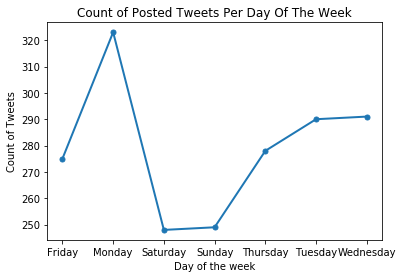

In [54]:
plt.plot(df.groupby(df.timestamp.dt.day_name()).tweet_id.count(),linewidth=2,marker='o',markersize=5)
plt.title('Count of Posted Tweets Per Day Of The Week')
plt.xlabel('Day of the week')
plt.ylabel('Count of Tweets')
plt.show()

In [55]:
df.groupby(df.source).tweet_id.count().sort_values()

source
TweetDeck               11
Twitter Web Client      28
Twitter for iPhone    1915
Name: tweet_id, dtype: int64

In [56]:
df.groupby(df.source).tweet_id.count()/df.shape[0]

source
TweetDeck             0.005629
Twitter Web Client    0.014330
Twitter for iPhone    0.980041
Name: tweet_id, dtype: float64

In [57]:
df.rating_numerator.value_counts()[:5]

12    446
10    417
11    392
13    253
9     149
Name: rating_numerator, dtype: int64

In [58]:
df.name.value_counts()[:5]

Charlie    11
Lucy       10
Cooper     10
Oliver     10
Tucker      9
Name: name, dtype: int64

In [59]:
df.stage.value_counts()

pupper            201
doggo              63
puppo              22
doggo, pupper       8
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: stage, dtype: int64

In [60]:
df.groupby(df.stage).mean()['fav_count']

stage
doggo             19356.380952
doggo, floofer    17169.000000
doggo, pupper     13219.875000
doggo, puppo      47844.000000
floofer           13206.000000
pupper             7250.527363
puppo             21582.090909
Name: fav_count, dtype: float64